## I am the man who arranges the blocks

In [175]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

import sys

In [498]:
jets = [1 if jet == '>' else -1 for jet in Path('tetris_test.txt').read_text()]

rock_types = ['horizontal', 'cross', 'backl', 'vertical', 'square']

shaft_width = 7

num_types = len(rock_types)

num_jets = len(jets)

In [499]:
# Worst case scenario of rock height is +1, +3, +3, +4, +2 and then cycling

def calculate_max_height(num_rocks):
    heights = [1, 3, 3, 4, 2]
    
    rock_types = len(heights)
    
    total_height = 0
    
    total_height += (num_rocks // rock_types)*sum(heights)
    
    for i in range(num_rocks % rock_types):
        total_height += heights[i]
        
    return total_height

In [500]:
def find_max_rock_height(shaft):
    max_y = np.where(shaft == 1)[0]
    if len(max_y) == 0:
        return 0
    else:
        return np.max(max_y)

In [501]:
# ####

# .#.
# ###
# .#.

# ..#
# ..#
# ###

# #
# #
# #
# #

# ##
# ##

class rock():
    
    # y coordinate of rock is lowest of rock y-coordinates
    # x coordinate of rock is left most coordinate at lowest rock y-coordinate
    def __init__(self, shape, coordinate):
        self.coordinate = coordinate
        self.shape = shape
        
        self.rock_coordinates = self.generate_coordinates(self.coordinate)
        
    def generate_coordinates(self, coordinate):
        
        shape = self.shape
        
        y, x = coordinate
        
        if shape == 'horizontal':
            rock_coordinates = [[y, x], [y, x+1], [y, x+2], [y, x+3]]
        elif shape == 'cross':
            rock_coordinates = [[y, x], [y+1, x-1], [y+1, x], [y+1, x+1], [y+2, x]]
        elif shape == 'backl':
            rock_coordinates = [[y, x], [y, x+1], [y, x+2], [y+1, x+2], [y+2, x+2]]
        elif shape == 'vertical':
            rock_coordinates = [[y, x], [y+1, x], [y+2, x], [y+3, x]]
        elif shape == 'square':
            rock_coordinates = [[y, x], [y, x+1], [y+1, x], [y+1, x+1]]
            
        return rock_coordinates
            
    def move(self, direction, shaft):
        
        y0, x0 = self.coordinate
        
        vy, vx = direction
        
        y1, x1 = [y0 + vy, x0 + vx]
        
        new_coords = self.generate_coordinates([y1, x1])
        
        if check_collision(new_coords, shaft) == False:
            self.coordinate = [y1, x1]
            self.rock_coordinates = self.generate_coordinates(self.coordinate)
            
            return True
        
        else:
            return False
        
def check_collision(coords, shaft):
    height, width = shaft.shape
    
    y_coords = np.array([coord[0] for coord in coords])
    x_coords = np.array([coord[1] for coord in coords])
    
    # Check if within bounds
    if np.all(y_coords >= 1) and np.all(y_coords < height) and np.all(x_coords >= 0) and np.all(x_coords < width):
        # Check for collision
        return np.any(np.array([shaft[tuple(coord)] for coord in coords]) == 1)
    
    else:
        return True

In [502]:
def spawn_rock(shape, height):
    if shape in ['horizontal', 'backl', 'vertical', 'square']:
        return rock(shape, [height, 2])
    elif shape == 'cross':
        return rock(shape, [height, 3])

In [503]:
def add_rock(shaft, rock):
    for coord in rock.rock_coordinates:
        shaft[tuple(coord)] = 1
        
    return shaft

In [533]:
num_rocks = 210

shaft_width = 7

shaft = np.zeros((calculate_max_height(num_rocks)+8, shaft_width))

rock_types = ['horizontal', 'cross', 'backl', 'vertical', 'square']

num_types = len(rock_types)

num_jets = len(jets)

jet_counter = 0

for i in range(num_rocks):
    current_rock_type = rock_types[i % num_types]
    
    current_max_height = find_max_rock_height(shaft)
    
    current_rock = spawn_rock(current_rock_type, current_max_height + 4)
    
    current_rock_moving = True
    
    while current_rock_moving:
        current_rock.move([0, jets[jet_counter % num_jets]], shaft)
        jet_counter += 1
        jet_counter %= num_jets
        
        if jet_counter == 0:
            print(i, i % 5)
        
        fall = current_rock.move([-1, 0], shaft)
        
        if not fall:
            current_rock_moving = False
            
    shaft = add_rock(shaft, current_rock)
    
print(find_max_rock_height(shaft))

8 3
14 4
22 2
29 4
36 1
43 3
49 4
57 2
64 4
71 1
78 3
84 4
92 2
99 4
106 1
113 3
119 4
127 2
134 4
141 1
148 3
154 4
162 2
169 4
176 1
183 3
189 4
197 2
204 4
325


In [525]:
jet_counter

194

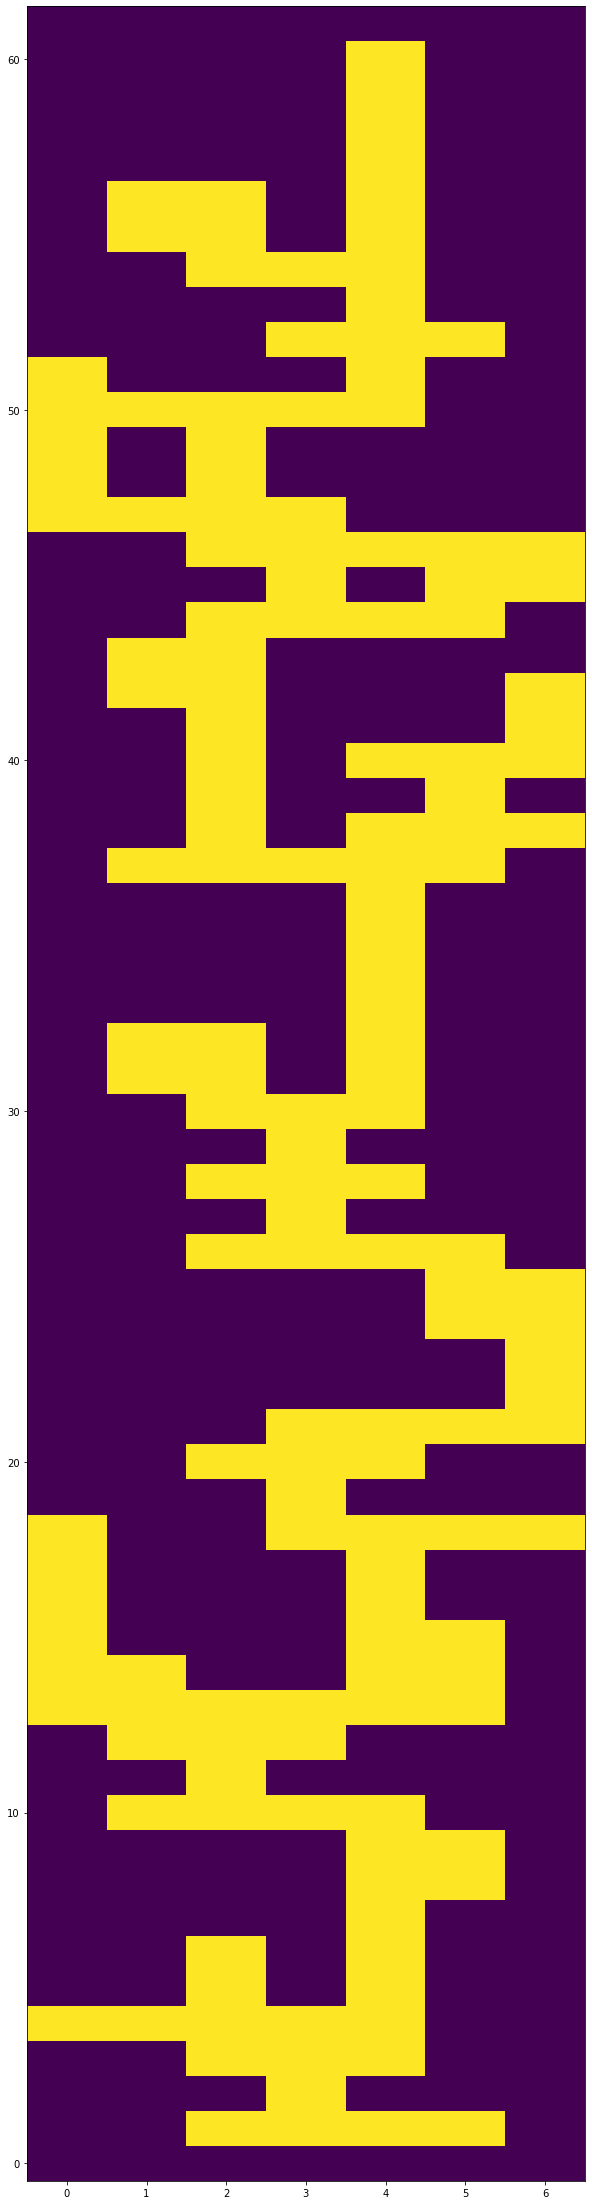

In [526]:
plt.figure(figsize = (10, 40))
plt.imshow(shaft[0:62], aspect = 'auto', origin = 'lower', interpolation = 'none')

## Part 2: Pointless work for pointless pay
## This is one game I shall not play

In [448]:
def build_til_blockade(start_rock, start_jet, shaft):
    
    shaft = np.copy(shaft)
    
    rock_counter = 0
    jet_counter = start_jet
    
    blocking_heights = [i for i in range(0, find_max_rock_height(shaft)) if np.all(shaft[i] == 1)]
    
    while len(blocking_heights) == 0:   
        
        current_rock_type = rock_types[(start_rock + rock_counter) % num_types]

        current_max_height = find_max_rock_height(shaft)

        current_rock = spawn_rock(current_rock_type, current_max_height + 4)

        current_rock_moving = True

        while current_rock_moving:
            current_rock.move([0, jets[jet_counter % num_jets]], shaft)
            jet_counter += 1
            jet_counter %= num_jets

            fall = current_rock.move([-1, 0], shaft)

            if not fall:
                current_rock_moving = False

        shaft = add_rock(shaft, current_rock)
        
        rock_counter += 1

        blocking_heights = [i for i in range(0, find_max_rock_height(shaft)) if np.all(shaft[i] == 1)]
        
    shaft_height = find_max_rock_height(shaft)
    
    return shaft[0:shaft_height+1], rock_counter, jet_counter

def build(start_rock, start_jet, rocks, shaft):
    
    shaft = np.copy(shaft)
    
    rock_counter = 0
    jet_counter = start_jet
    
    blocking_heights = [i for i in range(0, find_max_rock_height(shaft)) if np.all(shaft[i] == 1)]
    
    for i in range(start_rock, start_rock+rocks):   
        
        current_rock_type = rock_types[i % num_types]

        current_max_height = find_max_rock_height(shaft)

        current_rock = spawn_rock(current_rock_type, current_max_height + 4)

        current_rock_moving = True

        while current_rock_moving:
            current_rock.move([0, jets[jet_counter % num_jets]], shaft)
            jet_counter += 1
            jet_counter %= num_jets

            fall = current_rock.move([-1, 0], shaft)

            if not fall:
                current_rock_moving = False

        shaft = add_rock(shaft, current_rock)
        
        rock_counter += 1
        
    return shaft
        
    

In [491]:
rock_counter = 0

jet_counter = 0

buffer_height = 1000

empty_shaft = np.zeros((buffer_height, shaft_width))

shaft = np.copy(empty_shaft)

num_rocks = 202200

offset = 0

# while rock_counter < num_rocks:

while rock_counter < num_rocks:
    sys.stdout.write(f'\r{rock_counter}')
    
    blockade, rocks_added, moves = build_til_blockade(rock_counter, jet_counter, shaft)
    
    if rock_counter % 5 == 0 and jet_counter == 0 and rock_counter > 0:
        print(rock_counter)
        break
    
    if rock_counter + rocks_added > num_rocks:
        break
    
    blocking_height = max([i for i in range(blockade.shape[0]) if np.all(blockade[i] == 1)])
    
    offset += blocking_height
    rock_counter += rocks_added
    
    jet_counter += moves
    
    
    above = blockade[blocking_height+1:]
    
    shaft = np.copy(empty_shaft)
    shaft[1:1+above.shape[0]] = above

final_shaft = build(rock_counter, jet_counter, num_rocks - rock_counter, shaft)

print('\n')
print(offset + find_max_rock_height(final_shaft))

202131

318011


69